<a href="https://www.kaggle.com/code/lazuardialmuzaki/edinburgh-airbnb-listings-clustering?scriptVersionId=142559901" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Edinburgh AirBnB Listings Clustering #

Here are Python flow process of importing data, examining data, detecting missing values, detecting and dealing with outlier, classifying data class, clustering and plotting data into visualization

### #1 Importing Data

First, we load our data into Jupyter Notebook located in our specified directory. We are using 'Edinburgh Airbnb Listings' dataset with format of .csv (comma-seperated values)

In [1]:
# Specific libraries need to be imported to make all the codings possible. 
# Pandas is a library that allow us to process and manipulate tabular data format
# Matplotlib.pyplot is a library allow us in process of data visualization, which will be used later

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/kaggle/input/edinburgh-airbnb-listings/edinburgh_airbnb_listings.csv') #load the tabular data using read_csv method of pandas

In [2]:
#simply call the summoned the tabular data (next we call it as DataFrame), by typing the DataFrame name
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,15420,Georgian Boutique Apt City Centre,60423,Charlotte,NaN,"Old Town, Princes Street and Leith Street",55.95689,-3.18768,Entire home/apt,80,3,283,2019-06-23,2.76,1,193
1,24288,"Cool central Loft, sleeps 4, 2 double bed+en-s...",46498,Gordon,NaN,Meadows and Southside,55.94265,-3.18467,Entire home/apt,115,2,199,2019-06-19,1.86,1,4
2,38628,Edinburgh Holiday Let,165635,Trish,NaN,Joppa,55.94308,-3.09525,Entire home/apt,46,4,52,2019-05-29,0.85,2,288
3,44552,Double room - spacious Leith flat,195950,Shaun,NaN,South Leith,55.96600,-3.17241,Private room,32,2,184,2019-06-04,1.71,1,136
4,47616,"City flat, close to nature and the Fringe",216203,Ben,NaN,"Canongate, Southside and Dumbiedykes",55.94732,-3.17851,Private room,100,1,32,2019-05-26,0.84,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13240,36061175,Festival Fun - Edinburgh Living Central Flat,12856939,Stephanie,NaN,Niddrie,55.93293,-3.12485,Entire home/apt,95,2,0,NaN,NaN,2,61
13241,36061191,"The Knight Residence, 1 Bedroom Comfort",248634031,Mansley Serviced Apartments,NaN,Tollcross,55.94555,-3.20244,Entire home/apt,1000,1,0,NaN,NaN,8,358
13242,36061722,"The Knight Residence, 2 Bedroom Comfort",248634031,Mansley Serviced Apartments,NaN,Tollcross,55.94555,-3.20244,Entire home/apt,1000,1,0,NaN,NaN,8,358
13243,36061940,Student 2 bed flat,257966210,Lynsey,NaN,Slateford and Chesser,55.92972,-3.25460,Entire home/apt,47,213,0,NaN,NaN,16,298


### #2 Examining Data

From table of DataFrame above we can examine the nature of data. Paying attention to number of rows it has gives a glimpse that this dataset has one big collection of data (13,245 data). And examining the columns it has gives us ideas of how can we extract such insightful information by understanding what each column represents.

As a consultant wanting to help Edinburgh's City Council promoting Edinburgh city tourism, some insightful outcome of data processing needed in order to help fellow potential tourist to find their preferable accomodation while have their stay in the city.

With this objective, we assess that several columns will be vital for further data processing, some are:
- **Price**: Information of AirBnB's price per night
- **Minimum Nights**: Information how many nights minimum a guest could book a AirBnB
- **Room Type**: Information of room type category of AirBnB
- **Latitude and Logitude**: Information of AirBnB location's coordinate




### #3 Detecting Missing Value

Detecting Missing Value is important as we understand that data processing result may interprate differently when we include the missing value into calculation and when we don't (or when we drop them)


In [3]:
# isna() method finds whether there's (a) N/As value in DataFrame which return value 'True' if there's on, 
# and sum() method grouped and summed up the total number of N/A's in each group

data.isna().sum()

id                                    0
name                                  1
host_id                               0
host_name                            19
neighbourhood_group               13245
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2032
reviews_per_month                  2032
calculated_host_listings_count        0
availability_365                      0
dtype: int64

From result table showing the accumulation of N/A number per group, it shows that we've got N/A value on (nae, host_name, neighbourhood_group, last_review, reviews_per_month) columns. And since those columns aren't essential to our further analysis, we will let them be instead of dropping them off. 

### #4 Detecting and Dealing with Outlier

Detecting outlier means identifying which rows of data considered to be significantly different with the rest of majority data. Keeping outlier data will risk the quality and accuracy of our data processing conclusion, therefore become unreliable. 

In this ocassion, outlier data are examined based on its specific column's value for columns we'd already considered important for further data processing.

**Suspecting Outlier Data Through Summary Statistics and Boxplot**

Very first step to investigate whether specific column has outlier data within its entirety, we can use summarized statistic.

In [4]:
# Summary Statistics for 'Price' Column

# .describe() method has been useful in terms of giving a summarized statistics of our data

# groupby(['room_type']) method will categorize data based on the same categorical value, 
# and ['price'] define what column we're about to summarized

data.groupby(['room_type'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,8289.0,162.551092,452.887832,10.0,70.00,95.0,150.0,12345.0
Private room,4884.0,61.787674,235.448188,0.0,35.00,45.0,60.0,9999.0
Shared room,72.0,254.902778,420.420787,10.0,25.75,50.0,500.0,3000.0


From summary statistics above, we could see how several information are given:
- The room type available for all AirBnB are defined in three category type, which are: Entire Home, Private Room, and Shared Room
- The Entire type is the most available type, doubling the amount of Private room. On the other hand, shared room only available in few amounts
- Based on the value of each quartile of each room type, all room type have relatively large standard deviation. It shows how data in each room type may include amounts of outlier data value.
- It's also can be analyzed from the max value of each room type which differ far larger compared to the 75% quantile (especially the private room and shared room)

To make sure about how the data spread, boxplot visualitation is used


Text(0, 0.5, 'count')

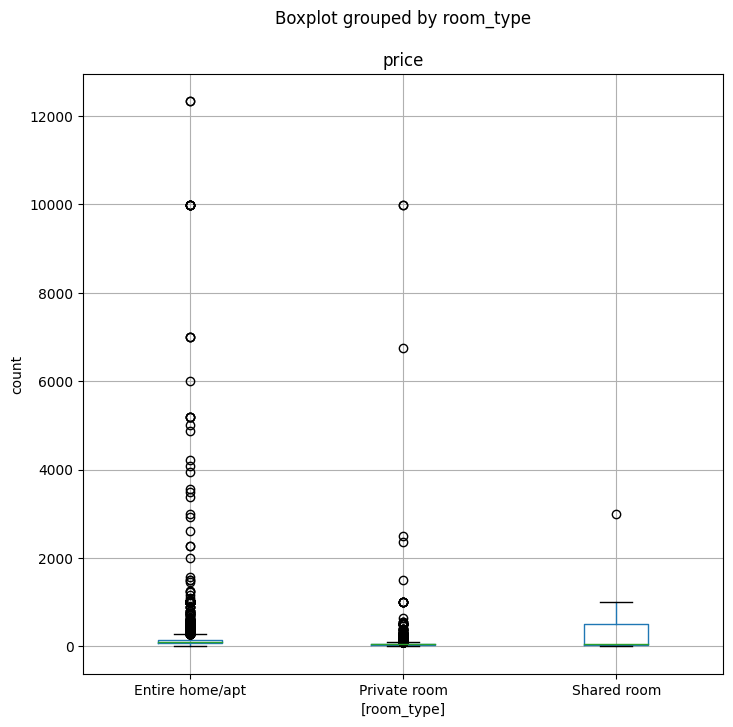

In [5]:
price_roomtype = data.loc[:,['price', 'room_type']] 
# price_roomtype is a new dummy variable that'll be used in boxplotting process.
# New dummy variable works by slicing the main DataFrame by the column we want to boxplot which is price and its room_type information


boxplot = price_roomtype.boxplot(by='room_type', figsize=(8,8))
plt.ylabel('count')
# Boxplot function assigned to the new dummy variable of price_roomtype, and we grouped them based on its room_type column value, the figure size statement is optional



From the boxplot above, it can be concluded that there are so many datapoints having a price value way larger than the most of datapoints placed inside the interquartile (represented by the box). For the Entire Home and Private Room type, the box seems very small and thin indicating how many datapoints spread above the 75% quantile.

Now we will check the boxplot for minimum_night column using the exact same procedure

Text(0, 0.5, 'count')

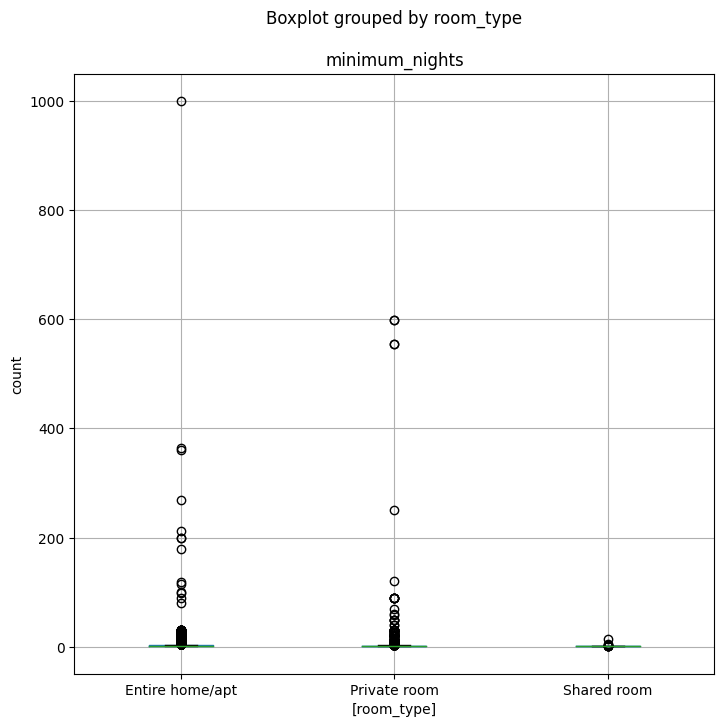

In [6]:
minimum_nights_roomtype = data.loc[:,['minimum_nights', 'room_type']]

boxplot = minimum_nights_roomtype.boxplot(by='room_type', figsize=(8,8))
plt.ylabel('count')


Turns out, the boxplot result of grouped value of minimum_nights also depicts many data points that spread above the 75% quantile despite we didn't suspect it earlier as we did for the price column using the describe() method that gives statistic summary.

Outlier makes bias, hence we normally want to get rid of it. In this ocassion, we have been detecting outliers value of data of room type group through boxplotting the date based on its price column and minimum_nights column. With this segmentation, we have generated this several class:
- Data of Price value of Entire Home
- Data of Price value of Private Room
- Data of Price value of Shared Room
- Data of Minimum Nights of Entire Home
- Data of Minimum Nights of Private Room
- Data of Minimum Nights of Shared Room

**Detecting Outliers through quantitative method**

Now, we have suspected that there may be outliers in each of these class, but to make sure, a quantitative method needed to point out if a datapoint is actually has an outlier value.

One selected method require us to calculate the upper and lower bound value which obtained from using the value of variables Q1,Q3 and IQR (Interquartile Range, or the difference between Q3 and Q1).
Upper bound value can be calculated with formula of = Q3 + (1.5 * IQR),
Lower bound value can be calculated with formula of = Q1 - (1.5 * IQR)

Every datapoint that has value either greater than upper bound or lower than lower bound is considered outlier.
Here is a self-defined Python function used to determine if a datapoint in DataFrame/dataset is an outlier through outlier test


In [7]:
import numpy as np #numpy libary is needed

outliers = [] # empty list of outlier data is set
def detect_outliers_iqr(a):
    
    q1 = np.percentile(a, 25) # We calculate the Q1 percentile
    q3 = np.percentile(a, 75) # As well as the Q3 percentile
    IQR = q3-q1 # IQR is calculated through this formula
    upr_bound = q3+(1.5*IQR) # Formula of upper bound

    for index, value in a.iterrows(): # we are checking index and value from variable.iterrows() which returns set of tuples of value index and the all column value for each row
        if value[0]>upr_bound: #if the first column in a row has value larger than upper bond we proceed to next 'if' with indentation
            if index not in outliers: #if index of a row has been identified in 'outliers' list then...
                outliers.append(index) #...we will append the outliers list with the row index information
    return len(outliers) #after all for iteration complete, we shall return the number of index in outliers list

Function above returns total number of index collection of rows which have an outlier value on its column.
But it can be seen that there's a modification on function above as it's not considering a datapoint that has a column value lower than the lower bond.

The reason behind this is that, for example if we're checking on Price column, very low value means that the AirBnB is cheap, and that is good to be maintained as it may attract visitor looking for affordability hence we won't consider it outlier. Very high value on the other hand, may interpreted as too expensive and City Council want to avoid that and not and not include it in further data processing.

**Creating sliced DataFrames for Outlier Test**

Refer to class that is generated before, we need to prepare a DataFrame that represent each class and has characteristic (like shape, columns) that fit so it could be executed as function input variable. Here it goes:

In [8]:
Price_Private = data.loc[(data['room_type']=='Private room'), ['price']]
Price_Shared = data.loc[(data['room_type']=='Shared room'), ['price']]
Price_Entire = data.loc[(data['room_type']=='Entire home/apt'), ['price']]

Min_Night_Private = data.loc[(data['room_type']=='Private room'), ['minimum_nights']]
Min_Night_Entire = data.loc[(data['room_type']=='Entire home/apt'), ['minimum_nights']]


Let's check the sample class DataFrame head 

In [9]:
print(Price_Shared.head())

      price
954      25
978      25
989      25
1452     18
1580     24


Perfect, now we can carry on calling the function for every class DataFrame

In [10]:
detect_outliers_iqr(Price_Private)
detect_outliers_iqr(Price_Shared)
detect_outliers_iqr(Price_Entire)

detect_outliers_iqr(Min_Night_Private)
detect_outliers_iqr(Min_Night_Entire)


1959

The result above shows how many datapoints in main DataFrame are outliers. As we can see, we call the function five times upon different classes. For each run of the function, they add outlier data index to 'outliers' list. 

We can check sample data that are considered outlier through print function below

In [11]:
data.loc[outliers].head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,47616,"City flat, close to nature and the Fringe",216203,Ben,NaN,"Canongate, Southside and Dumbiedykes",55.94732,-3.17851,Private room,100,1,32,2019-05-26,0.84,1,0
46,291287,StayinginScotland,1509791,Naomi,NaN,New Town West,55.95764,-3.20627,Private room,100,1,0,NaN,NaN,2,163
49,303689,Quiet Single Room in Edinburgh-Wifi,1563155,Carole,NaN,Oxgangs,55.90737,-3.22198,Private room,120,1,13,2017-05-28,0.15,1,364
272,970323,Sandaig Guest House,5301341,Karen,NaN,Leith (Hermitage and Prospect Bank),55.96884,-3.16190,Private room,130,2,1,2019-01-27,0.20,1,0
296,1076718,Room in luxury city centre apartment,278199,Angus,NaN,Comely Bank,55.95511,-3.21423,Private room,100,5,3,2013-07-09,0.04,1,329
297,1081177,Dbl room in Historic Georgian Home,5946677,Felicitas,NaN,New Town West,55.95674,-3.20047,Private room,150,1,10,2018-08-23,0.14,2,301
322,1197834,Twin room in Historic Georgian Home,5946677,Felicitas,NaN,New Town West,55.95536,-3.20201,Private room,125,1,50,2019-06-11,0.75,2,299
329,1234586,Allburys Boutique B&B,6731833,Derrick,NaN,Deans Village,55.94787,-3.22215,Private room,390,2,0,NaN,NaN,1,365
530,2225760,City Centre Doubleroom - great area,10444994,Edward,NaN,Broughton North and Powderhall,55.96295,-3.19439,Private room,180,1,20,2016-09-26,0.34,2,107
596,2755925,Ensuite double - Princes St 5 mins,14097277,Pat,NaN,New Town West,55.95521,-3.19353,Private room,109,2,35,2018-08-26,0.55,2,0


Next, we're going to make New Main DataFrame which is actually our old DataFrame but with all the outliers being dropped

In [12]:
new_data = data.drop(outliers)
new_data.shape

(11286, 16)

The total rows information given from .shape function indicates that the rows number has decreased due to outliers dropping

**Checking Boxplot after Outlier Dropping**

We will check whether now the data spread better using boxplot visualization

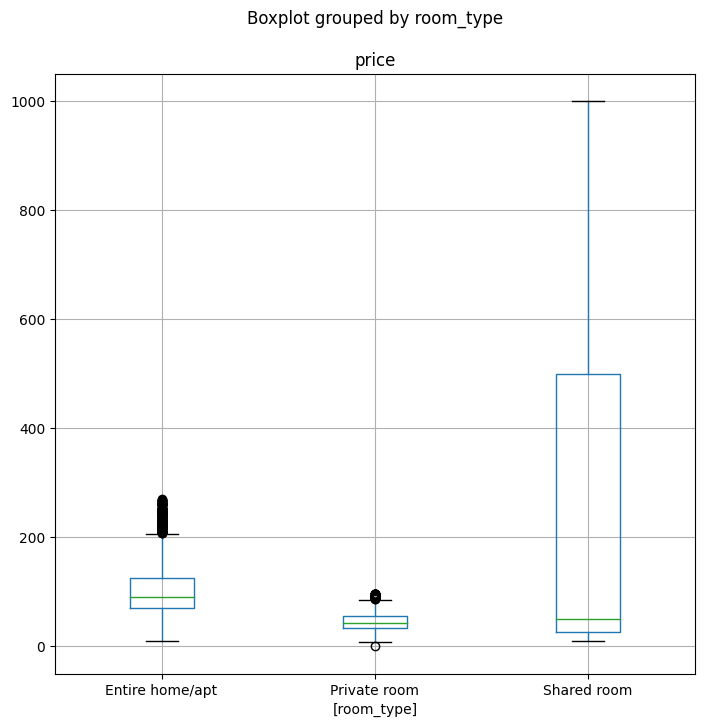

In [13]:
price_roomtype = new_data.loc[:,['price', 'room_type']]

boxplot = price_roomtype.boxplot(by='room_type', figsize=(8,8))

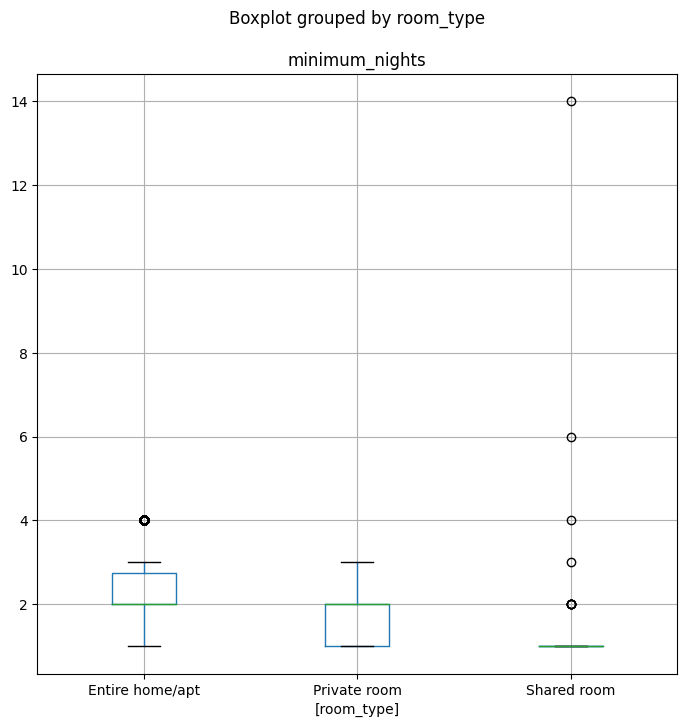

In [14]:
minimum_nights_roomtype = new_data.loc[:,['minimum_nights', 'room_type']]

boxplot = minimum_nights_roomtype.boxplot(by='room_type', figsize=(8,8))


In [15]:
new_data.groupby('room_type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,7022.0,103.510538,48.767967,10.0,70.0,90.0,125.0,270.0
Private room,4193.0,45.494634,16.802471,0.0,34.0,43.0,55.0,96.0
Shared room,71.0,216.239437,264.786030,10.0,25.5,50.0,500.0,1000.0


In [16]:
new_data.groupby('room_type')['minimum_nights'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,7022.0,2.103105,0.735429,1.0,2.0,2.0,2.75,4.0
Private room,4193.0,1.587169,0.643595,1.0,1.0,2.0,2.00,3.0
Shared room,71.0,1.408451,1.695182,1.0,1.0,1.0,1.00,14.0


From Boxplots above, we could clearly see that the data has now spread better. It's known that there are still several data having value higher than the new upper bound for some category for each column (price and minimum nights), but the difference are considerable. In case of minimum nights boxplot for Shared Room category, there's still high number of datapoints above the boxplot, but the City Council decided not to eliminate them as their value aren't too high and still considerable (maximum data of 14 days minimum nights)

From the summary statistics, we could see also how the standard deviation for all of the category in all columns (price and minimum nights) decreases immensely and how the maximum value also dropped.

With this result, therefore we could progress into next process

### #5 Classifying Data Class

We've already classifying data in the process of detecting and dealing with outliers before. But that was not enough to actually give proper insights to Edinburgh's potential tourist.

Before, we classified data of AirBnB based on its room type for each of its price and minimum nights information. And as the discussion going with City Council, we need to classify also for both the price and the minimum nights.

The **Price Classification** would benefit potential tourist to find an accomodation by their budget. And as the Edinburgh's AirBnB expert has informed that normally the more expensive an AirBnB price, the more luxury the facilities and amenities would be, we decided to classify price into three class: **Cheap, Standard, and Luxury**

For the **Minimum Nights Classification**, we decided to only classify into two class: **Short Stay** class is for an accomodation which only has 1 minimum nights to book, great fit for tourist who are visiting only for one short night or for those who don't have their itinerary fixed. And **Long Stay** class is ideal for those who have their itinerary packed and intended to stay in the same place.

**K-Means Clustering**

K-Means is one clustering method where we partition amounts of observation into k number of clusters in which each observation belongs to the cluster with the nearest mean.

Again, we define the K-Mean Clustering calculation using self-defined function. In designing variable input of the function, we again need to create another dummy variable that fit as function input. 

Clustering is needed in this case because we want to determine the value characteristic of price that represent each class of Cheap, Standard and Luxury. Like for example, what is the mean price of Cheap AirBnB, what is the range, is one AirBnB considered cheap or not. With clustering, we make it possible.

On the other hand, we won't cluster the value of minimum nights columns as the parameter of cluster has already been defined where Short Stay equal to 1 minimum night and Long Stay where it's more than one minimum night.

In [17]:
# K-Mean Clustering

from sklearn.cluster import KMeans #importing KMeans tool from Sklearn

X_Private=new_data.loc[(new_data['room_type']=='Private room'), ['price', 'minimum_nights', 'latitude','longitude']]
X_Entire=new_data.loc[(new_data['room_type']=='Entire home/apt'), ['price','minimum_nights','latitude','longitude']]
X_Shared=new_data.loc[(new_data['room_type']=='Shared room'), ['price','minimum_nights','latitude','longitude']]

np.random.seed(112)
def createclusters(x):
    # First, we create the model with parameters
    k_m = KMeans(n_clusters = 3, init="random")
    # Next, we fit the data and predict (not really applicable here), but assign cluster labels
    k_m.fit_predict(x)
    # The k_m object stores both the labels and clusters, which can be accessed like this:
    #print(k_m.labels_)
    print(k_m.cluster_centers_)
    x['Price_Cluster'] = k_m.labels_


Function above gives two outcome. First one, it will print each of cluster center point for all columns with numerical value. Second one, it will add one new column named 'Price_Cluster' that store information of cluster ID represents where one datapoint belong to.

In [18]:
createclusters(X_Entire)

[[ 74.27109358   2.07626561  55.95209544  -3.19619774]
 [133.36189335   2.15158778  55.95177335  -3.19791633]
 [209.33037975   2.1556962   55.95129772  -3.1965388 ]]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


createclusters(X_Entire) demonstrates clustering process based on price value for the AirBnB room type of Entire Apartment.
Interpreting the result, we only want to see the first column as it represent 'price' column. With this result, we know that Cheap Price, Standard Price, and Luxury Price have center point value of 74, 133, and 209 respectively. Not only that, it can be confirmed that all datapoints that is Entire Apartment room type has all been assigned to their respective cluster. 


And as price cluster has been defined, we can execute further slicing to our DataFrames as below: 

In [19]:
# We slice X_Entire which is a DataFrame for every row that room_type column is Entire Apartment into classes of Price and Minimum Nights

X_Entire_Cheap_Short = X_Entire.loc[(X_Entire['Price_Cluster']==0) & (X_Entire['minimum_nights']==1)]
X_Entire_Cheap_Long = X_Entire.loc[(X_Entire['Price_Cluster']==0) & (X_Entire['minimum_nights'] > 1)]

X_Entire_Standard_Short = X_Entire.loc[(X_Entire['Price_Cluster']==1) & (X_Entire['minimum_nights'] == 1)]
X_Entire_Standard_Long = X_Entire.loc[(X_Entire['Price_Cluster']==1) & (X_Entire['minimum_nights'] > 1)]

X_Entire_Luxury_Short = X_Entire.loc[(X_Entire['Price_Cluster']==2) & (X_Entire['minimum_nights'] == 1)]
X_Entire_Luxury_Long = X_Entire.loc[(X_Entire['Price_Cluster']==2) & (X_Entire['minimum_nights'] > 1)]


As code above, we do the same procedure to X_Private, but keep in mind to call createclusters() function first so the clusters are generated and the cluster information are stored

In [20]:
createclusters(X_Private)

X_Private_Luxury_Short = X_Private.loc[(X_Private['Price_Cluster']==0) & (X_Private['minimum_nights']==1)]
X_Private_Luxury_Long = X_Private.loc[(X_Private['Price_Cluster']==0) & (X_Private['minimum_nights'] > 1)]

X_Private_Cheap_Short = X_Private.loc[(X_Private['Price_Cluster']==1) & (X_Private['minimum_nights']==1)]
X_Private_Cheap_Long = X_Private.loc[(X_Private['Price_Cluster']==1) & (X_Private['minimum_nights'] > 1)]

X_Private_Standard_Short = X_Private.loc[(X_Private['Price_Cluster']==2) & (X_Private['minimum_nights']==1)]
X_Private_Standard_Long = X_Private.loc[(X_Private['Price_Cluster']==2) & (X_Private['minimum_nights'] > 1)]

[[70.96619411  1.61941112 55.94967923 -3.19698509]
 [29.38269987  1.54718218 55.94707229 -3.20284984]
 [46.19714286  1.60514286 55.95064885 -3.19922635]]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


We do the same exact procedure for X_Shared of Shared Room

In [21]:
createclusters(X_Shared)

X_Shared_Standard_Short = X_Shared.loc[(X_Shared['Price_Cluster']==0) & (X_Shared['minimum_nights']==1)]
X_Shared_Standard_Long = X_Shared.loc[(X_Shared['Price_Cluster']==0) & (X_Shared['minimum_nights'] > 1)]

X_Shared_Luxury_Short = X_Shared.loc[(X_Shared['Price_Cluster']==1) & (X_Shared['minimum_nights']==1)]
X_Shared_Luxury_Long = X_Shared.loc[(X_Shared['Price_Cluster']==1) & (X_Shared['minimum_nights'] > 1)]

X_Shared_Cheap_Short = X_Shared.loc[(X_Shared['Price_Cluster']==2) & (X_Shared['minimum_nights']==1)]
X_Shared_Cheap_Long = X_Shared.loc[(X_Shared['Price_Cluster']==2) & (X_Shared['minimum_nights'] > 1)]

[[ 489.52380952    1.           55.94564143   -3.19355048]
 [1000.            1.           55.95075333   -3.18995   ]
 [  44.10638298    1.61702128   55.94413979   -3.1999    ]]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## #6 Plotting Data into Visualization

To generate meaningful insight, data visualization may offer one of the best option to utilize. Presenting information through visual may help in spotting the key information in data as well as make your data becoming more interactive.

After we have divided the data into several group of classes, we want to make it more digestible through scatter plot. 
By taking advantage to the latitude and longitude information in DataFrame, we could present every datapoint of AirBnB into a scatter figure that tells how'd they spread and how they are actually located for each category class that have been created just before.

First we are going to create a function that returns scatter plot of longitude (x axis) and latitude (y axis) information







In [22]:
def makescatter(variable):
    return plt.scatter(variable['longitude'],variable['latitude'], alpha=.5)
    

Now, we shall use the function to actually plot the data into scatter plot. Code below demonstrate how all sub classes in Entire Apartment room type being depicted in scatter plot

Text(0.5, 1.0, 'AirBnB: Entire Apartment, Luxury Price, Long Stay')

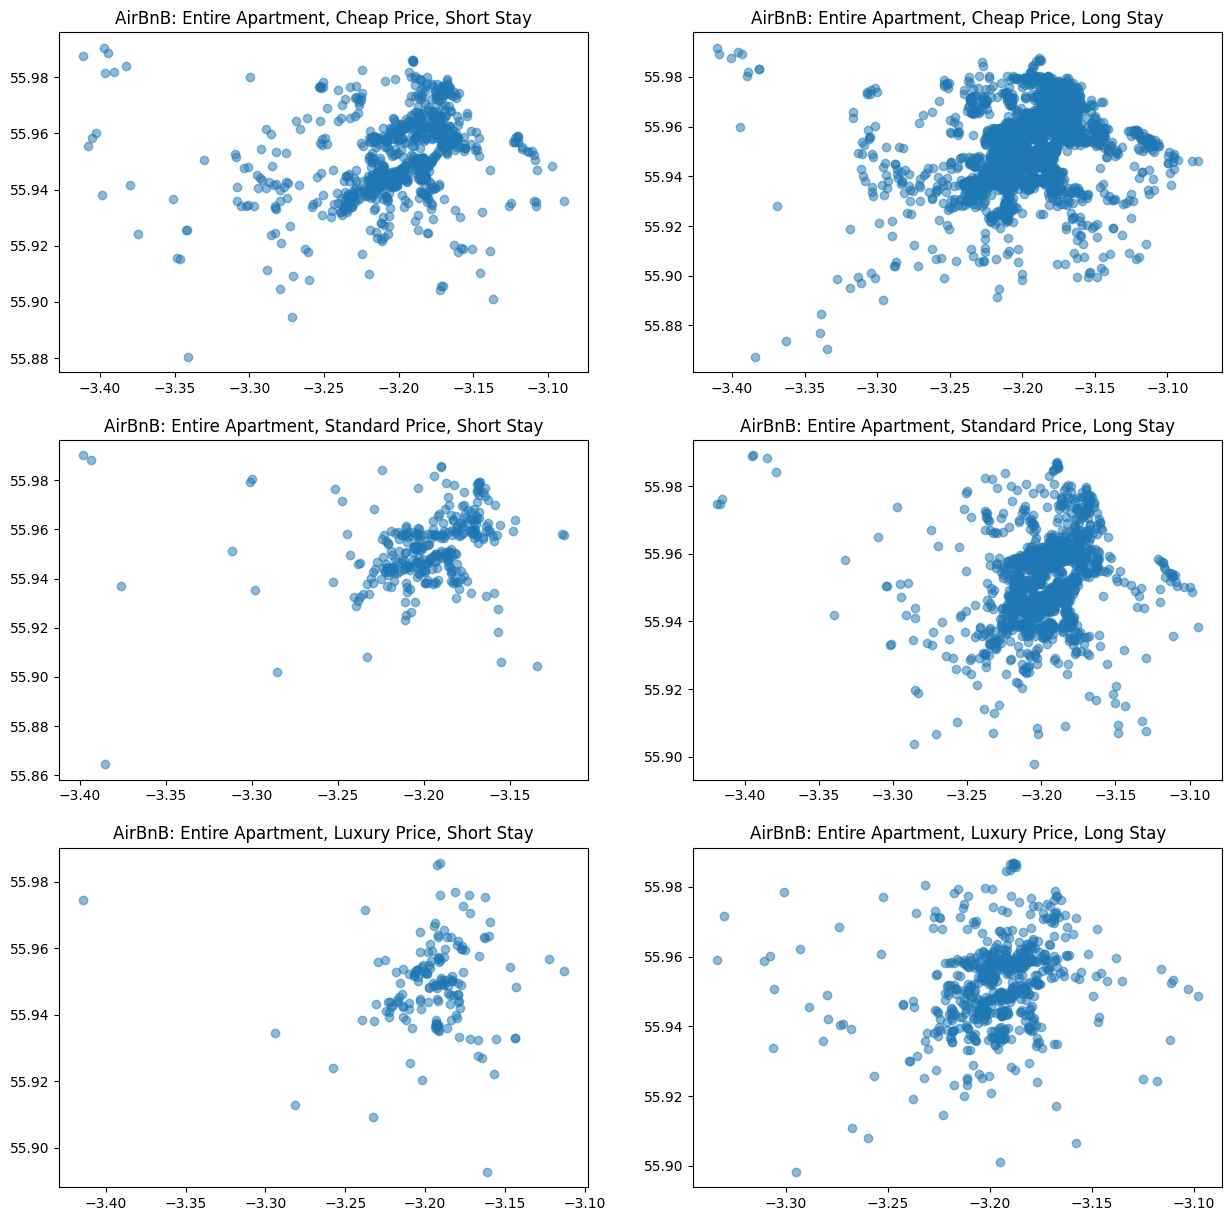

In [23]:
plt.subplots(3,2, figsize=(15,15))

plt.subplot(3,2,1)
makescatter(X_Entire_Cheap_Short)
plt.title('AirBnB: Entire Apartment, Cheap Price, Short Stay')

plt.subplot(3,2,2)
makescatter(X_Entire_Cheap_Long)
plt.title('AirBnB: Entire Apartment, Cheap Price, Long Stay')

plt.subplot(3,2,3)
makescatter(X_Entire_Standard_Short)
plt.title('AirBnB: Entire Apartment, Standard Price, Short Stay')

plt.subplot(3,2,4)
makescatter(X_Entire_Standard_Long)
plt.title('AirBnB: Entire Apartment, Standard Price, Long Stay')

plt.subplot(3,2,5)
makescatter(X_Entire_Luxury_Short)
plt.title('AirBnB: Entire Apartment, Luxury Price, Short Stay')

plt.subplot(3,2,6)
makescatter(X_Entire_Luxury_Long)
plt.title('AirBnB: Entire Apartment, Luxury Price, Long Stay')

There we go, we have created 6 scatter plots that represent each subclass in Entire Apartment room type class.
But notice that, although it gives an understanding of how the accomodation spread, it is certain that it's lacking context related to the city of Edinburgh itself. We knew how the data spread but not exactly where they are.

To fix this, and to enchance the understanding of information, the scatter plot needs to have a backdrop of Edinburgh map. Hence, we will using more advance visualization using another Python library of Geopandas.

In [24]:
# install geopandas through !pip command

!pip install geopandas



In [25]:
# import all required libraries

import geopandas as gpd
from shapely.geometry import Point, Polygon

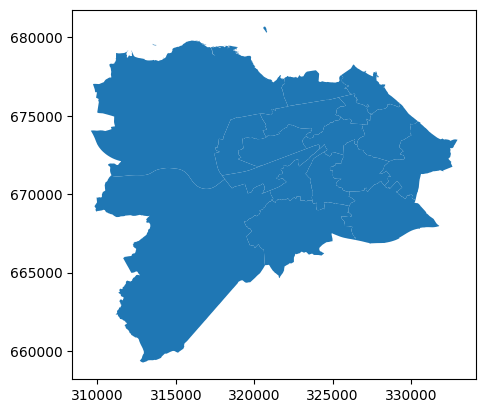

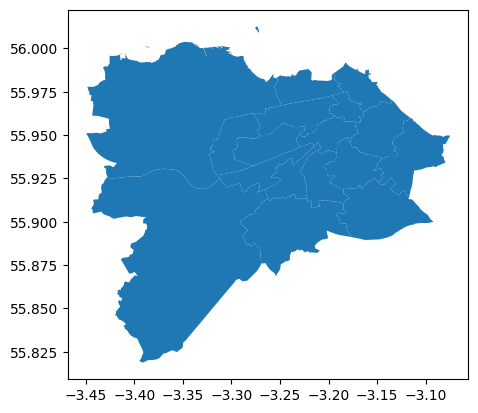

In [26]:
# Import the downloaded shapefile format that contain the map image of Edinburgh city, use the geopandas library to make the process possible

Edinburgh_map = gpd.read_file('/kaggle/input/edinburgh-ward-boundary/Edinburgh_Ward_Boundaries.shp')
Edinburgh_map.plot()

# to_crs method of geopandas allow us to convert the x and y axis so it represent the actual longitude and latitude of the city

Edinburgh_map.to_crs(epsg=4326).plot()
crs = "EPSG:4326"

It can be seen from two of graph above. Simply plotting .shp file results the map figure with meaningless x and y axis scale, but adding it with to_crs method, it now gives us relevant longitude and latitude on its x and y axis respectively.

As now our base of backdrop map is ready, it's time to set a function to put the scatter points in front of the map for each of subclass.

In [27]:
def scattertomap(variable):
    geometry = [Point(xy) for xy in zip(variable['longitude'], variable['latitude'])] # collecting the longitude and latitude as x and y axis information
    geo_df = gpd.GeoDataFrame(variable, 
                          crs = crs, 
                          geometry = geometry) # convert the information into Geopandas GataFrame
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,10)) #make 2 subplots, get the index number of subplots
    Edinburgh_map.to_crs(epsg=4326).plot(ax=ax2, color='lightgrey') #plot the map to subplot 2
    a = geo_df.plot(ax=ax2, alpha=.5, label= ('AirBnB= {}'.format(len(variable.index)))) #plot the scatter data to subplot 2
    b = variable['price'].hist(ax=ax1, label=('Mean = {}'.format(variable['price'].mean().round(1)))) # plot the price histogram to subplot 1
    
    # add some details
    b.set_xlabel('Price', fontsize=20)
    b.set_ylabel('Count', fontsize=20)
    a.set_xlabel('Longitude', fontsize=15)
    a.set_ylabel('Latitude', fontsize=15)
    b.set_title('Price x AirBnB Count Histogram')
    a.legend()
    b.legend()

Here below, we demonstrate the use of the self-defined function for each subclass

Text(0.5, 1.0, 'AirBnB: Entire Apartment, Luxury Price, Long Stay')

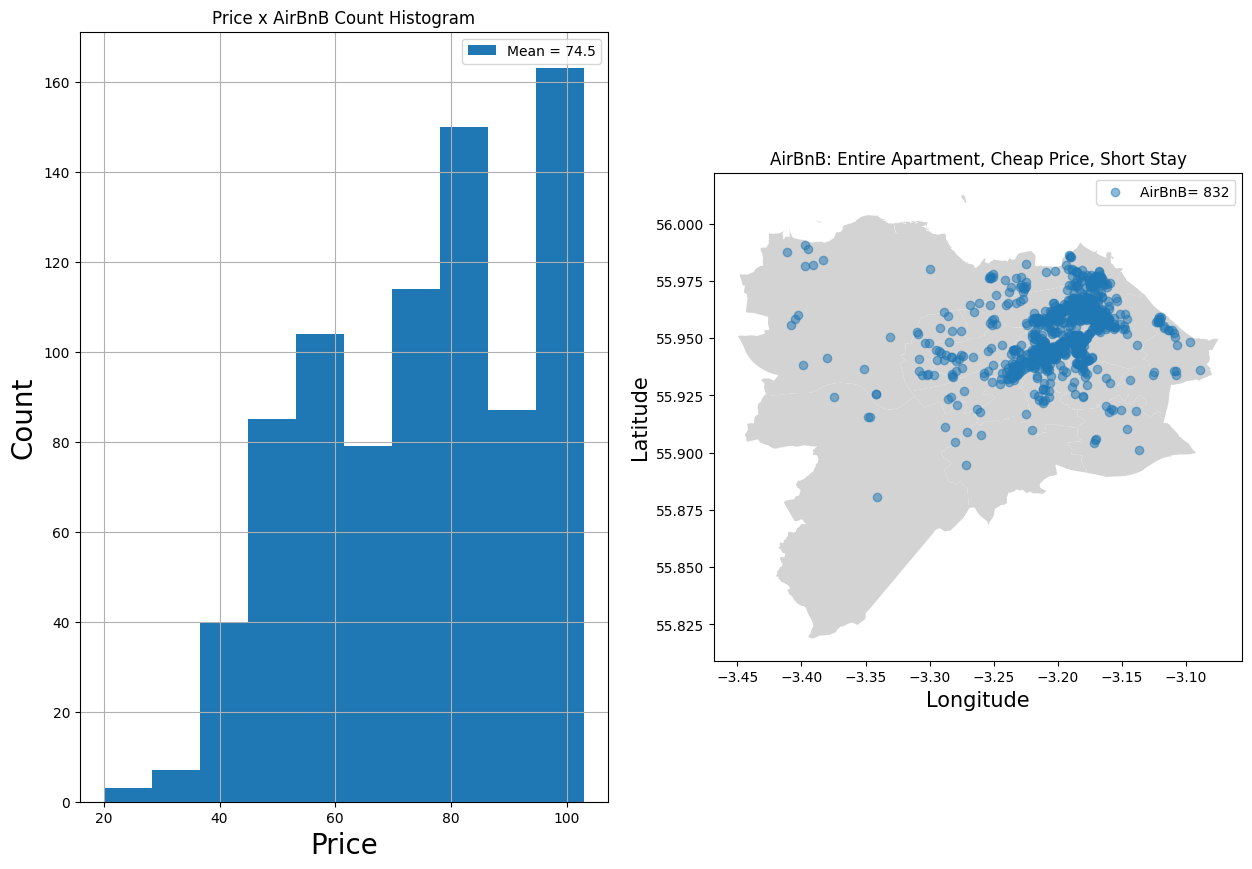

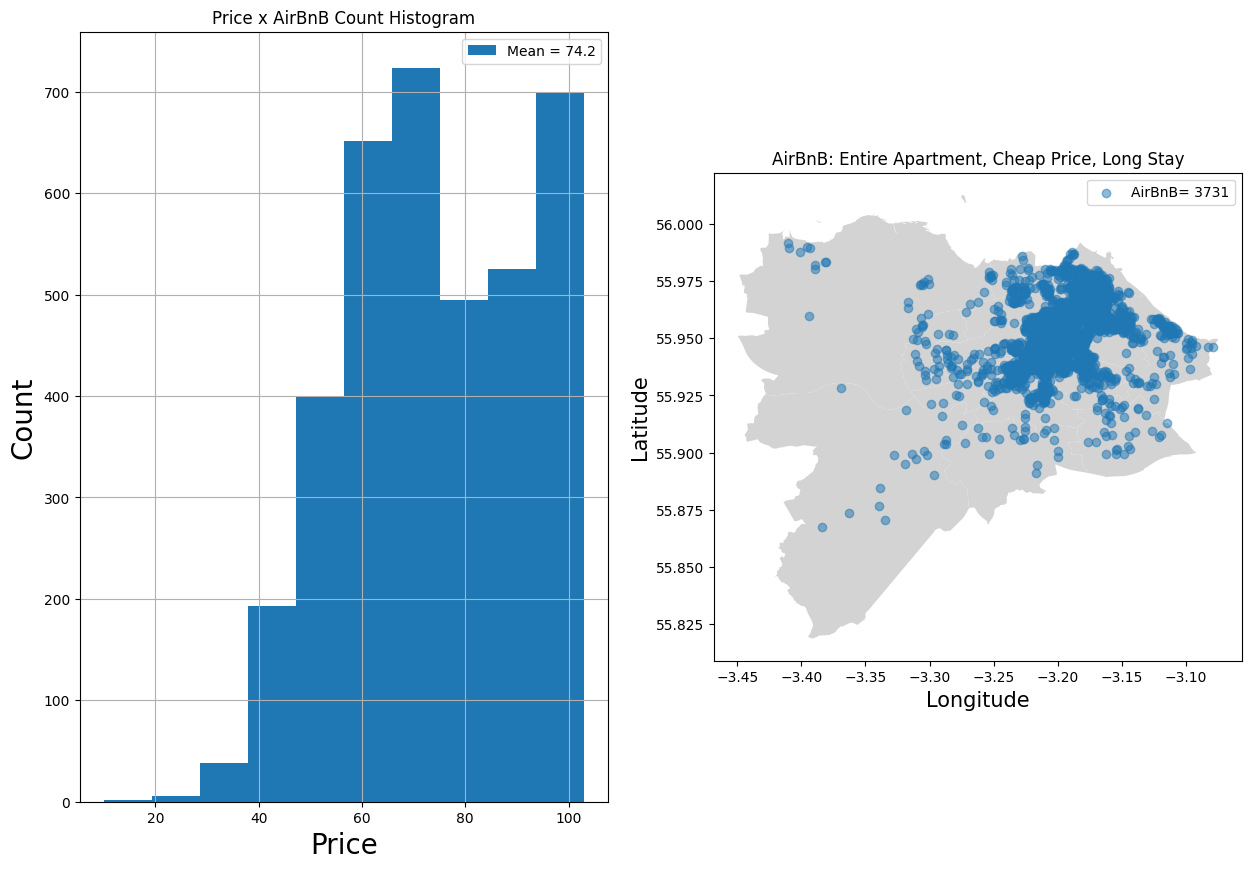

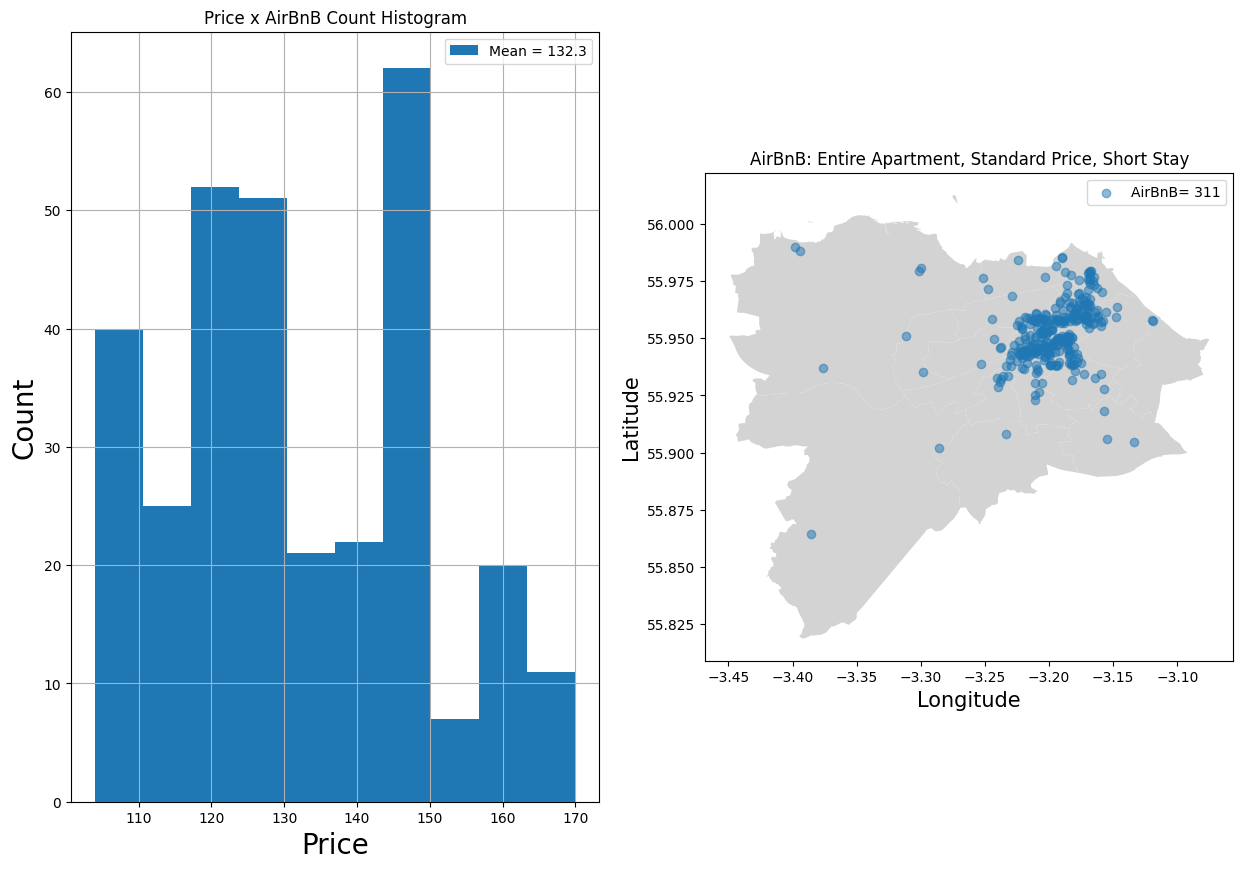

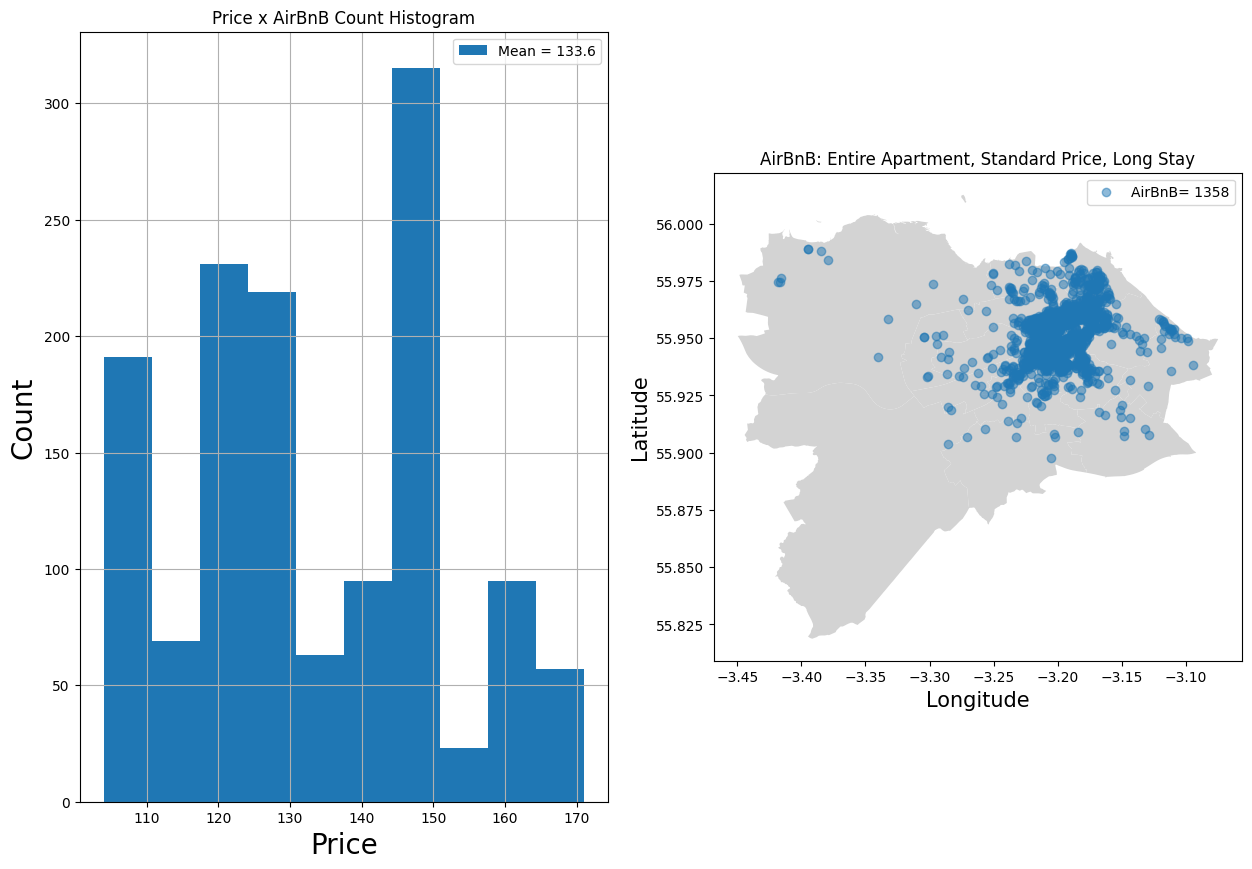

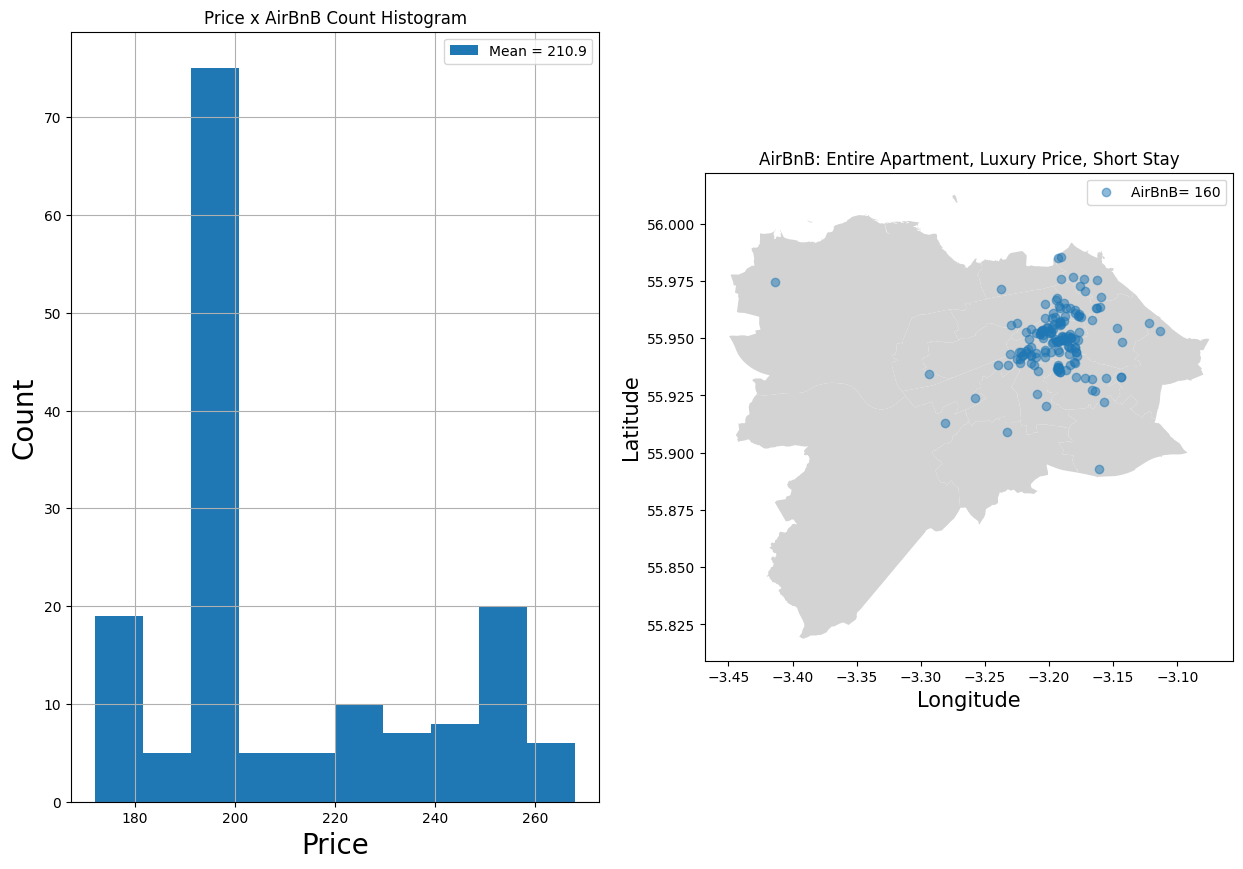

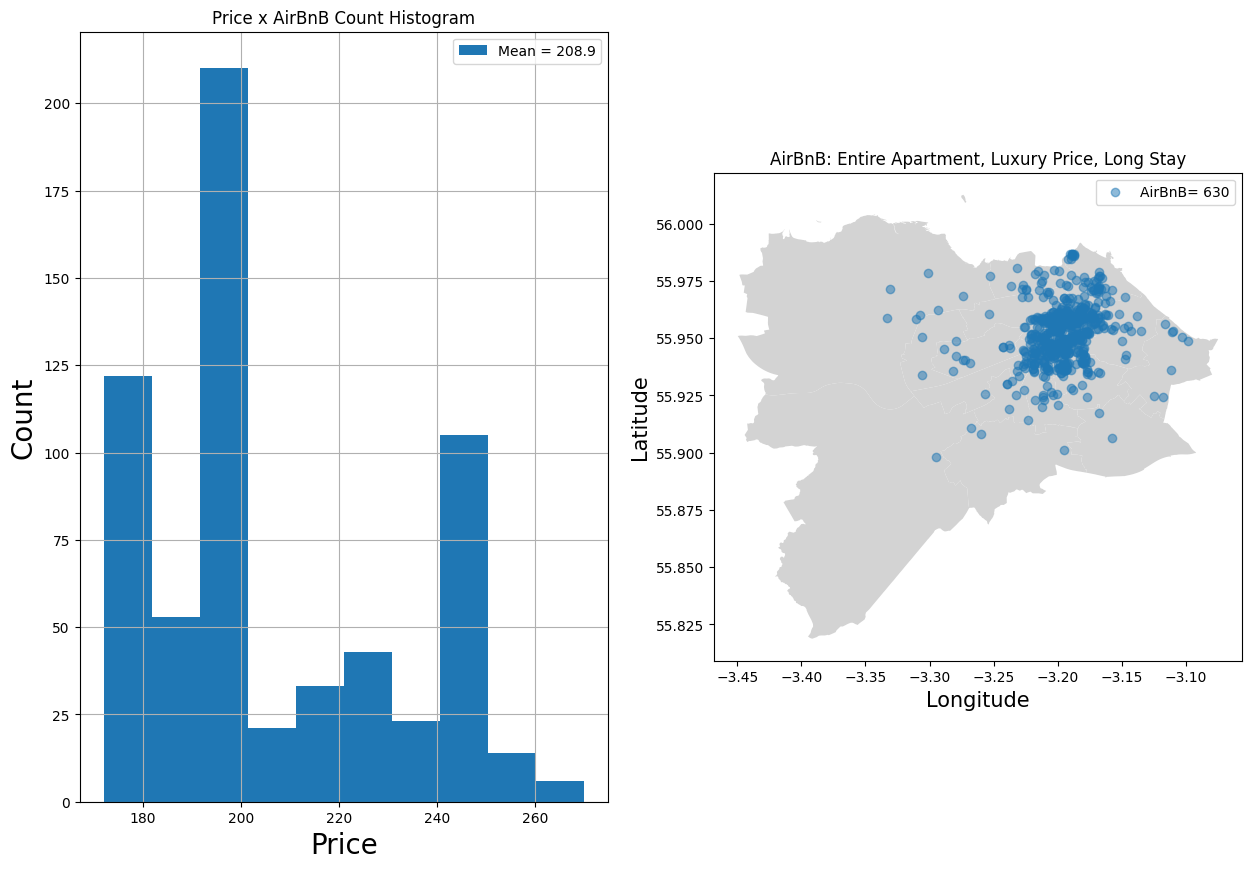

In [28]:
scattertomap(X_Entire_Cheap_Short) # Recall the scatter to map function to dataframe class of Entire Apartment room type, Cheap price, and Short Stay
plt.title('AirBnB: Entire Apartment, Cheap Price, Short Stay')

# And try to recall it to the rest of subclass in Entire Apartment room type

scattertomap(X_Entire_Cheap_Long)
plt.title('AirBnB: Entire Apartment, Cheap Price, Long Stay')


scattertomap(X_Entire_Standard_Short)
plt.title('AirBnB: Entire Apartment, Standard Price, Short Stay')

scattertomap(X_Entire_Standard_Long)
plt.title('AirBnB: Entire Apartment, Standard Price, Long Stay')


scattertomap(X_Entire_Luxury_Short)
plt.title('AirBnB: Entire Apartment, Luxury Price, Short Stay')

scattertomap(X_Entire_Luxury_Long)
plt.title('AirBnB: Entire Apartment, Luxury Price, Long Stay')



Text(0.5, 1.0, 'AirBnB: Private Apartment, Luxury Price, Long Stay')

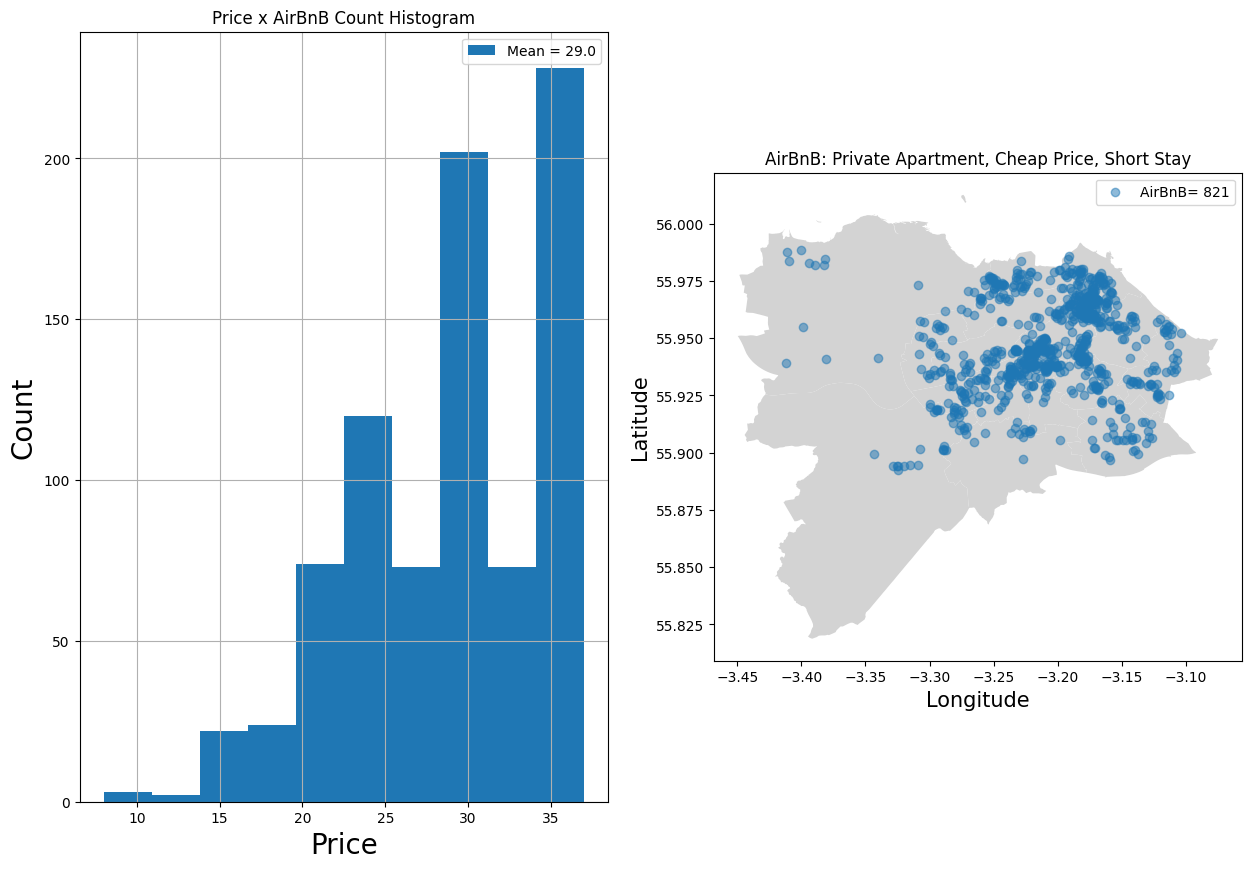

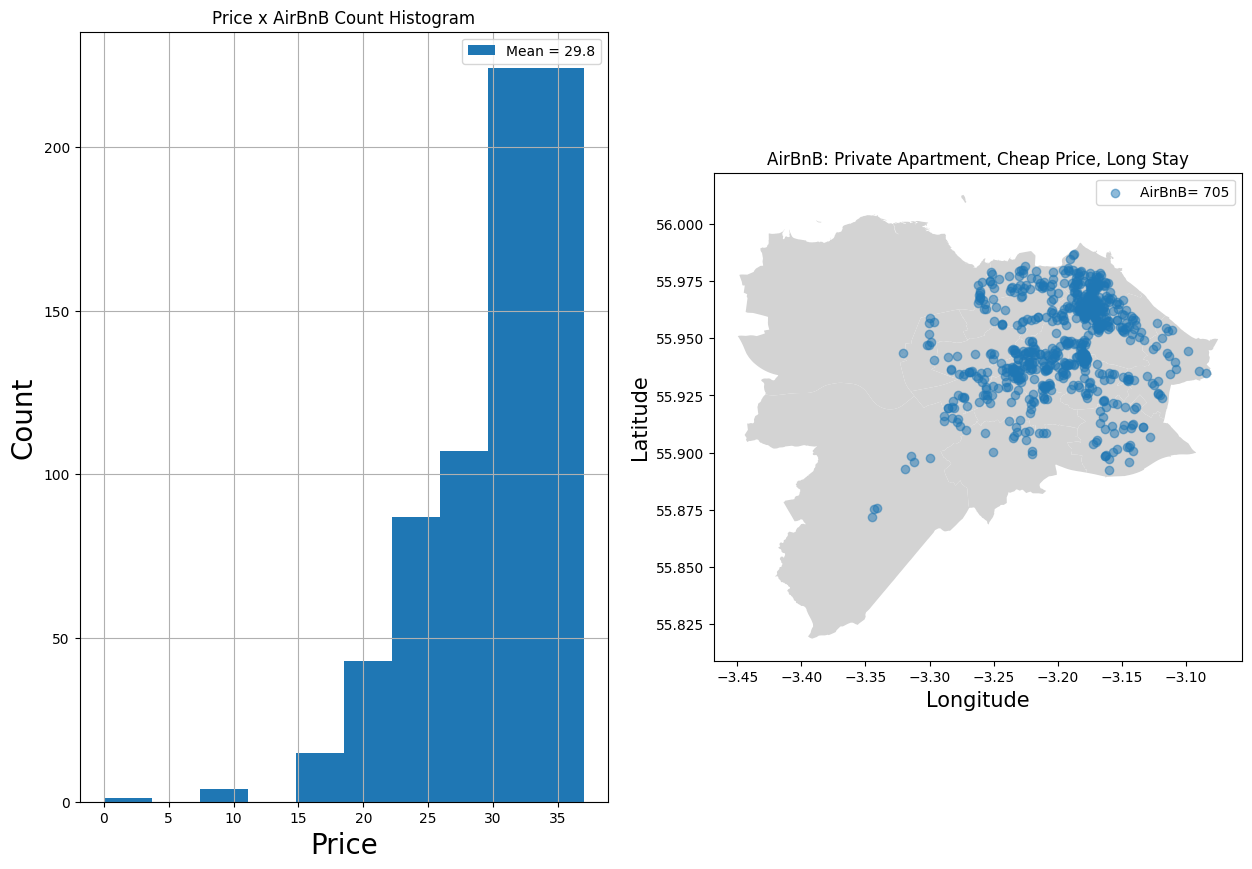

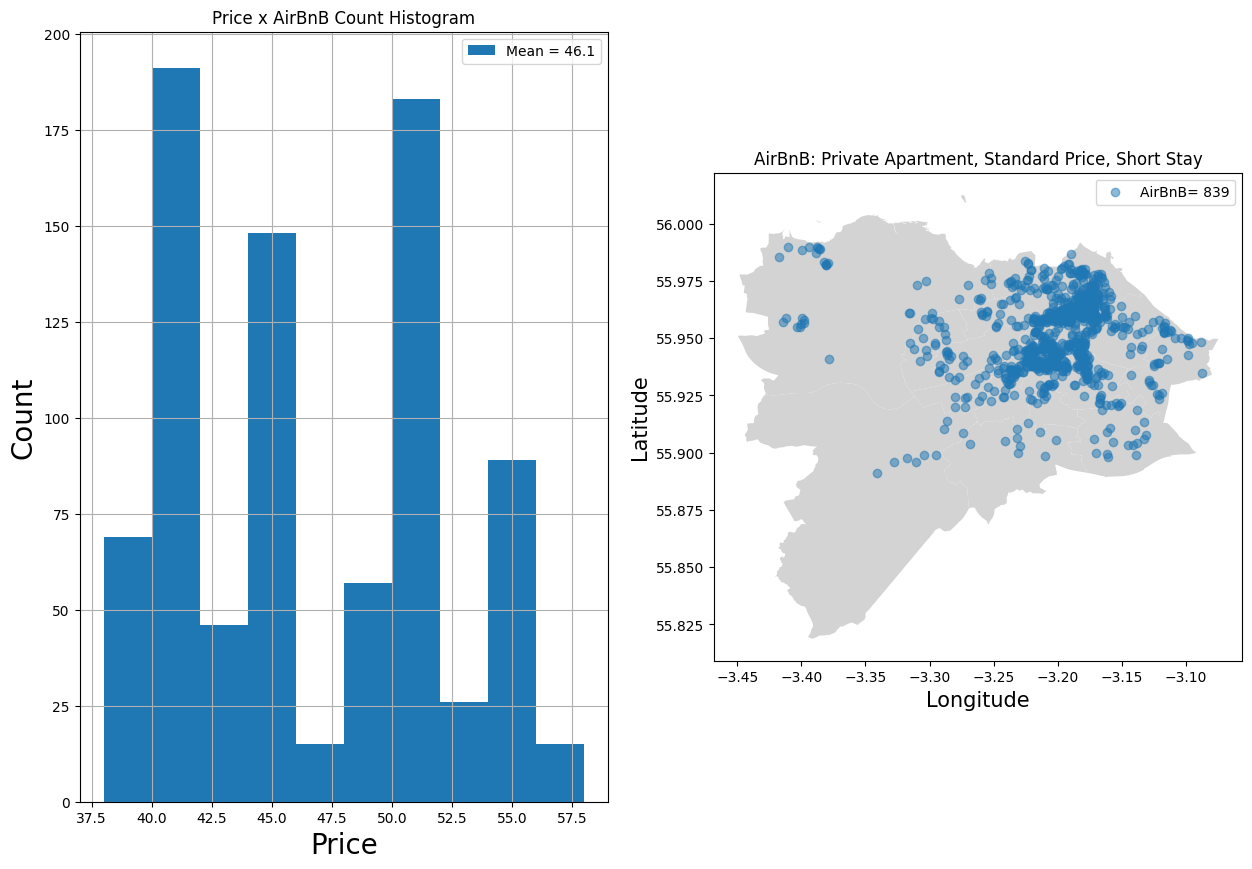

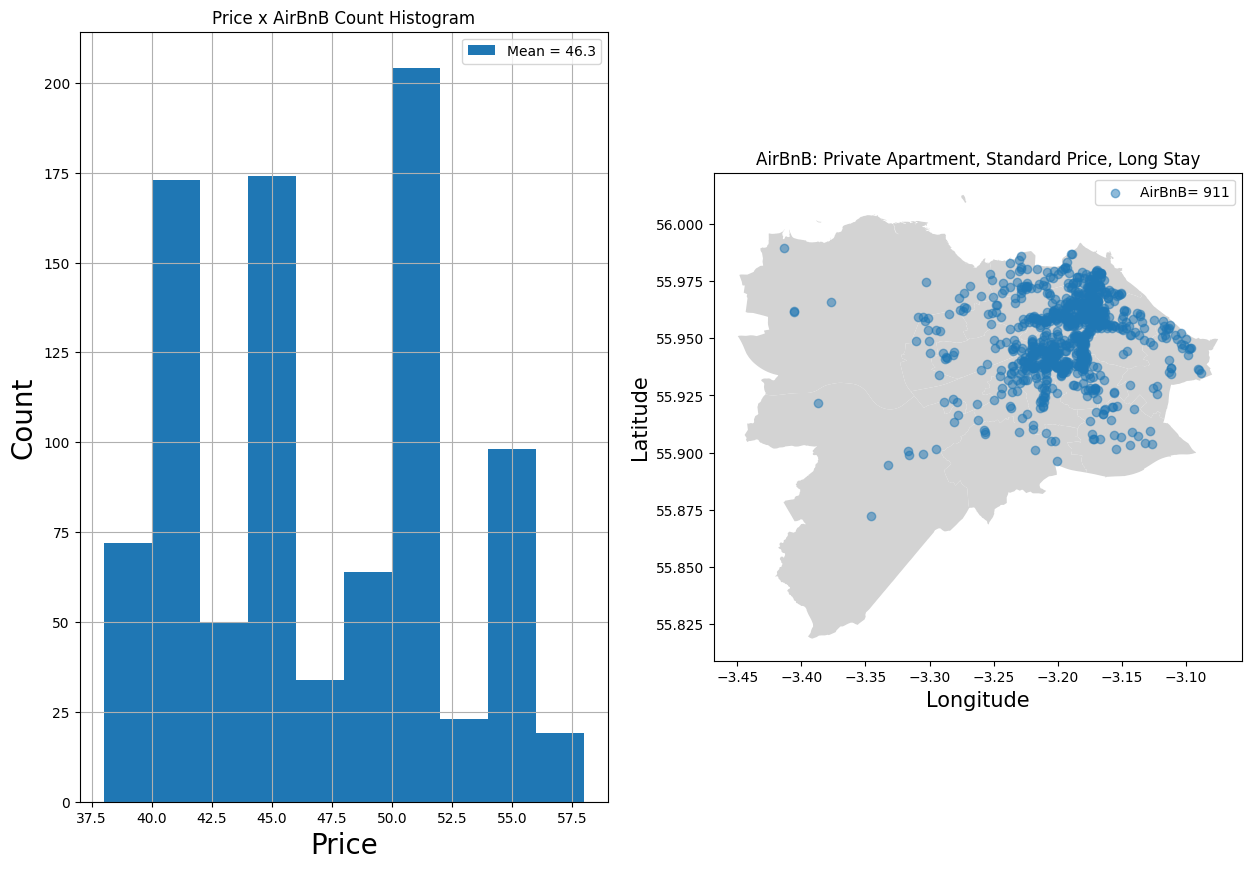

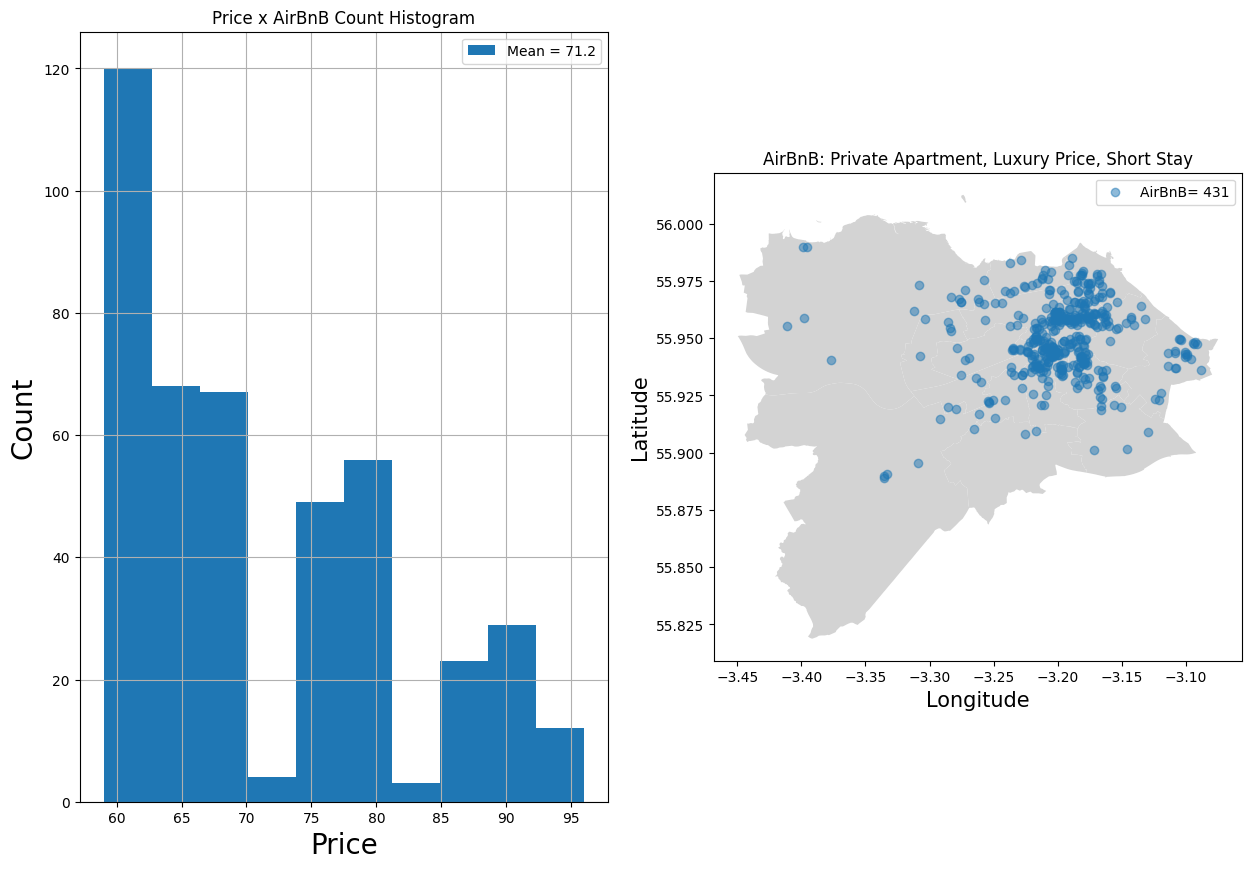

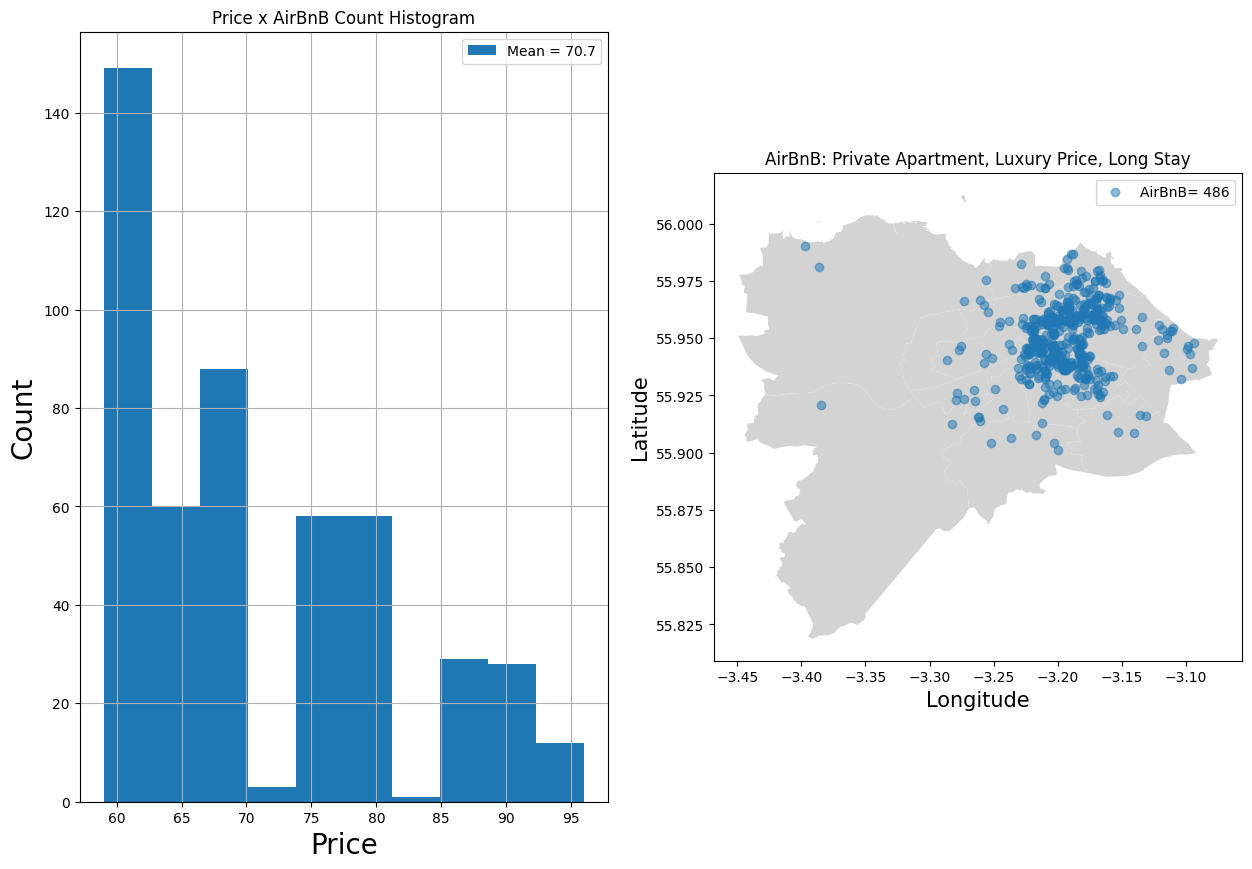

In [29]:
# Do the exact procedure to the Private Room room type

scattertomap(X_Private_Cheap_Short) 
plt.title('AirBnB: Private Apartment, Cheap Price, Short Stay')


scattertomap(X_Private_Cheap_Long)
plt.title('AirBnB: Private Apartment, Cheap Price, Long Stay')


scattertomap(X_Private_Standard_Short)
plt.title('AirBnB: Private Apartment, Standard Price, Short Stay')

scattertomap(X_Private_Standard_Long)
plt.title('AirBnB: Private Apartment, Standard Price, Long Stay')


scattertomap(X_Private_Luxury_Short)
plt.title('AirBnB: Private Apartment, Luxury Price, Short Stay')

scattertomap(X_Private_Luxury_Long)
plt.title('AirBnB: Private Apartment, Luxury Price, Long Stay')




Text(0.5, 1.0, 'AirBnB: Shared Room, Luxury Price, Short Stay')

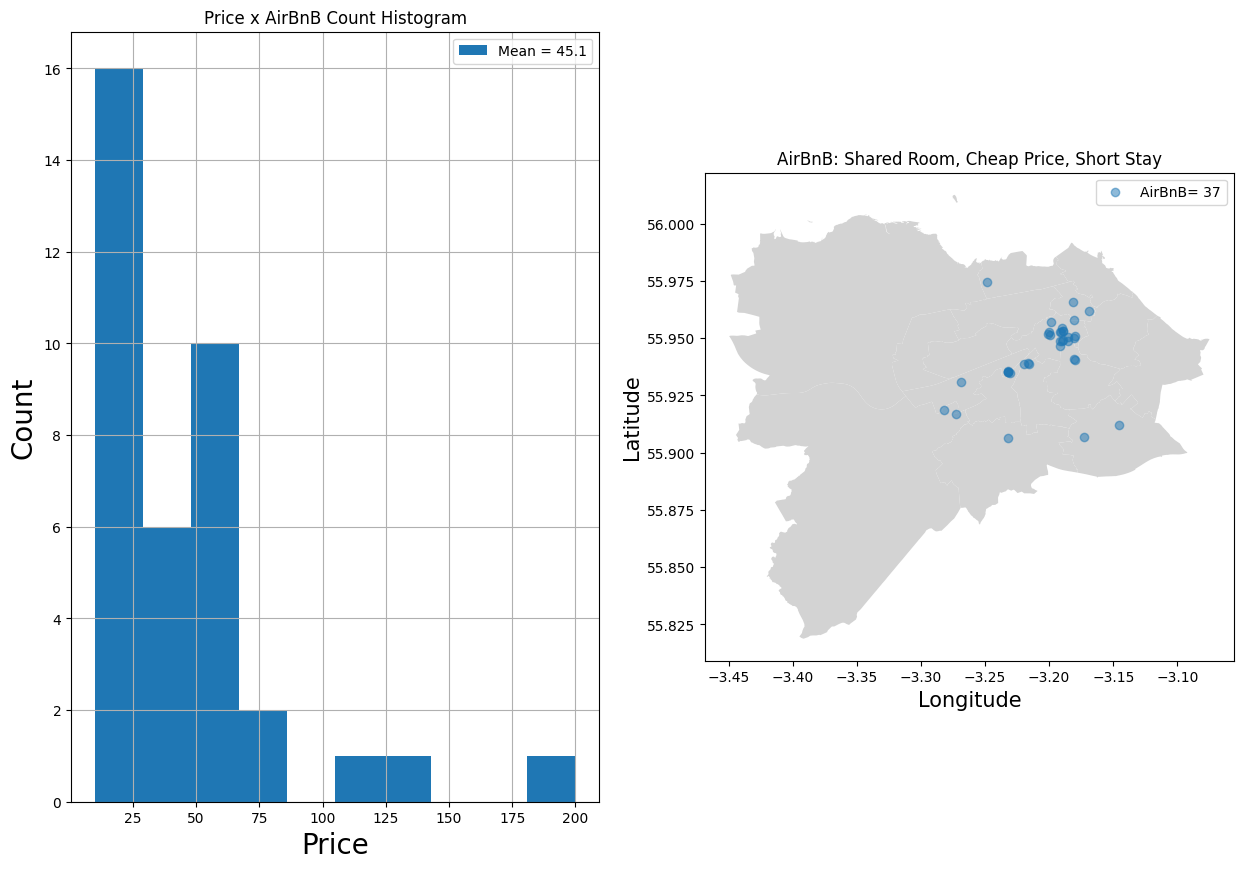

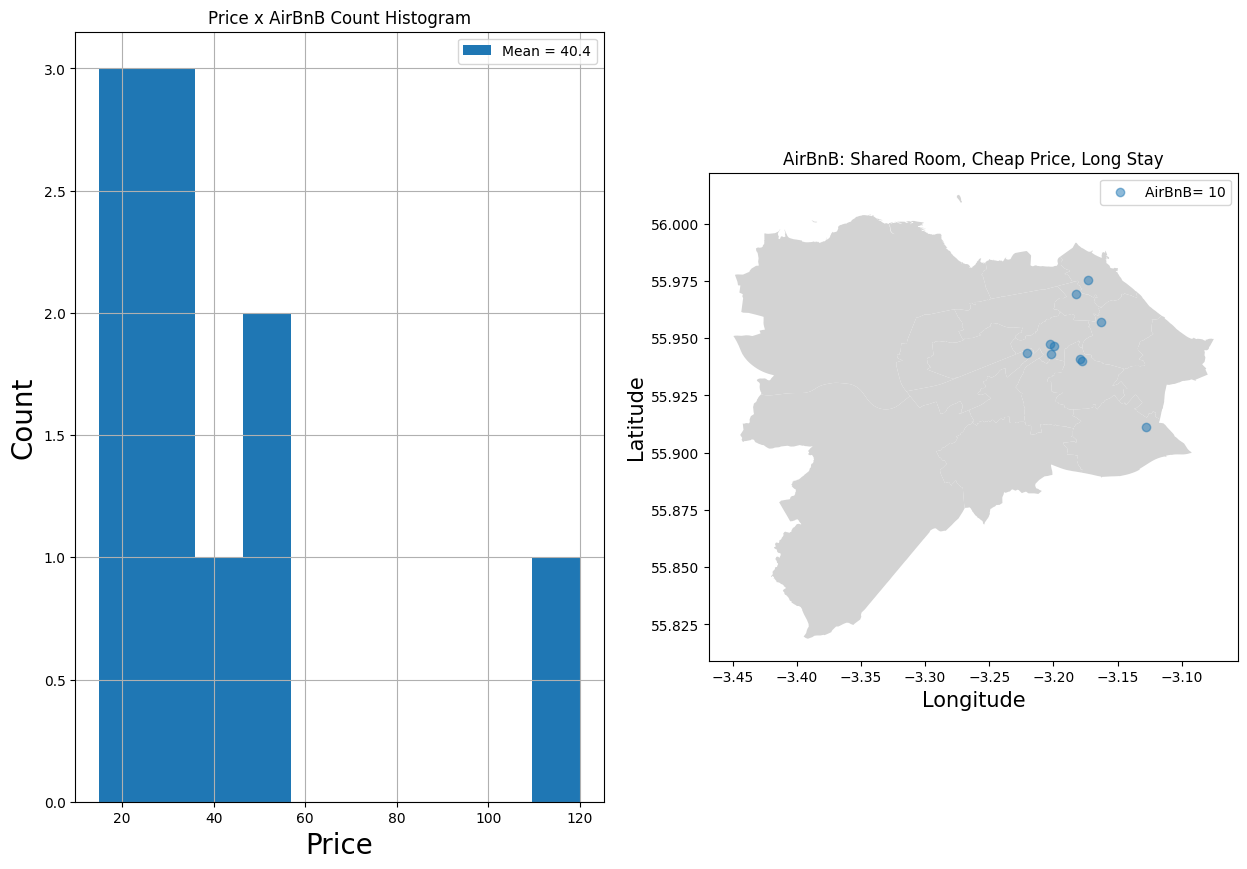

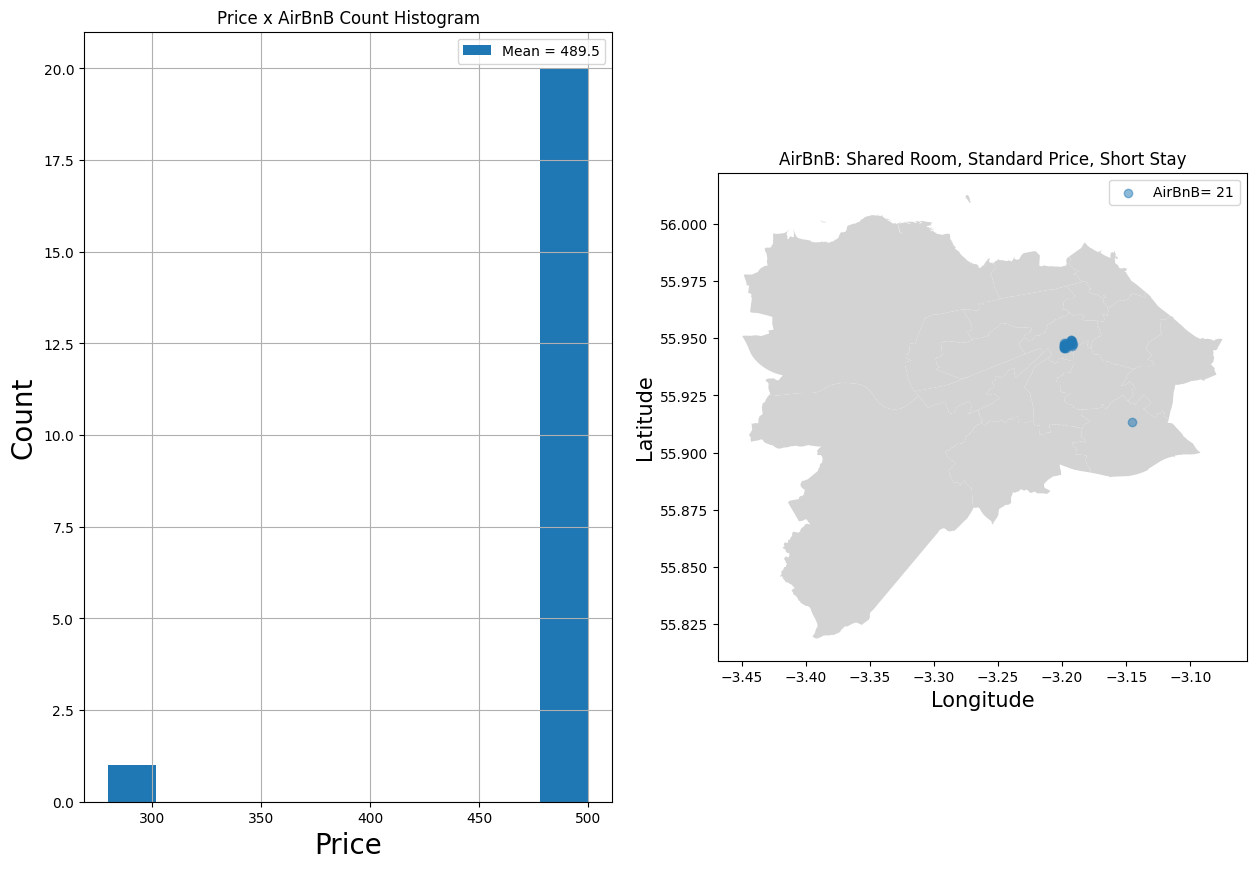

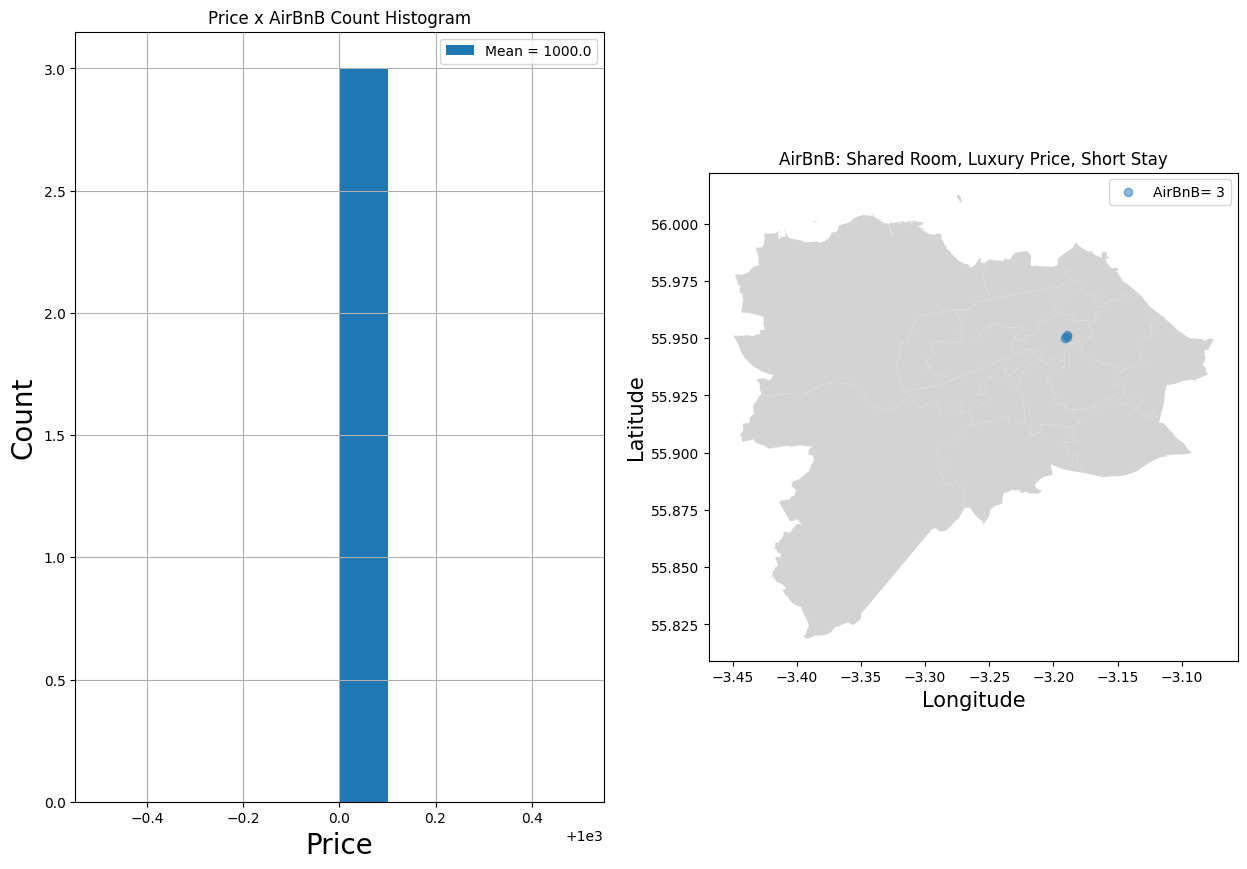

In [30]:
# And for the Shared Room room type

scattertomap(X_Shared_Cheap_Short) 
plt.title('AirBnB: Shared Room, Cheap Price, Short Stay')


scattertomap(X_Shared_Cheap_Long)
plt.title('AirBnB: Shared Room, Cheap Price, Long Stay')


scattertomap(X_Shared_Standard_Short)
plt.title('AirBnB: Shared Room, Standard Price, Short Stay')


scattertomap(X_Shared_Luxury_Short)
plt.title('AirBnB: Shared Room, Luxury Price, Short Stay')

# Note that we don't plot the Luxury price, Long Stay and Standard price, long stay as it contain no data



## Study Case Summary



Edinburgh's City Council has recently found that tourism rate in Edinburgh showed an unconvincing rise years after pandemic. VisitScotland Organization told city council that one issue for tourist is finding preferable accommodation based on feedback they’d been collecting. Knowing this, City Council want to develop interactive information as a guide for future potential tourist, helping them finding more suitable accommodation, improving the experience.

City Council then gathered data from AirBnB, hoping it will develop sense to potential tourist that the city got more than adequate options. But that won't be enough, City Council also want to present the data into classes of classification that's hoped to match various tourist's preferences.

The challenge while processing the data would be putting off outliers. Outlier detection and treatment is needed as outlier datapoints disrupt data dispersion and represent irrelevant datapoints. For example, too expensive AirBnB contradict affordability, and how AirBnB with months minimum nights indicate a temporary residential which contradict idea of tourism.
Through classification that’s both performed through quantitative method and subjectivity intuitive, some variation of class generated through data visualization aiming to help tourist staying in Edinburgh.

Here’s example of plots and table showing Entire Apartment type, cheap price, for short stay. Now our potential tourist knows how the price varies and average in the class, where the location, and details.



Text(0.5, 1.0, 'AirBnB: Entire Apartment, Cheap Price, Short Stay')

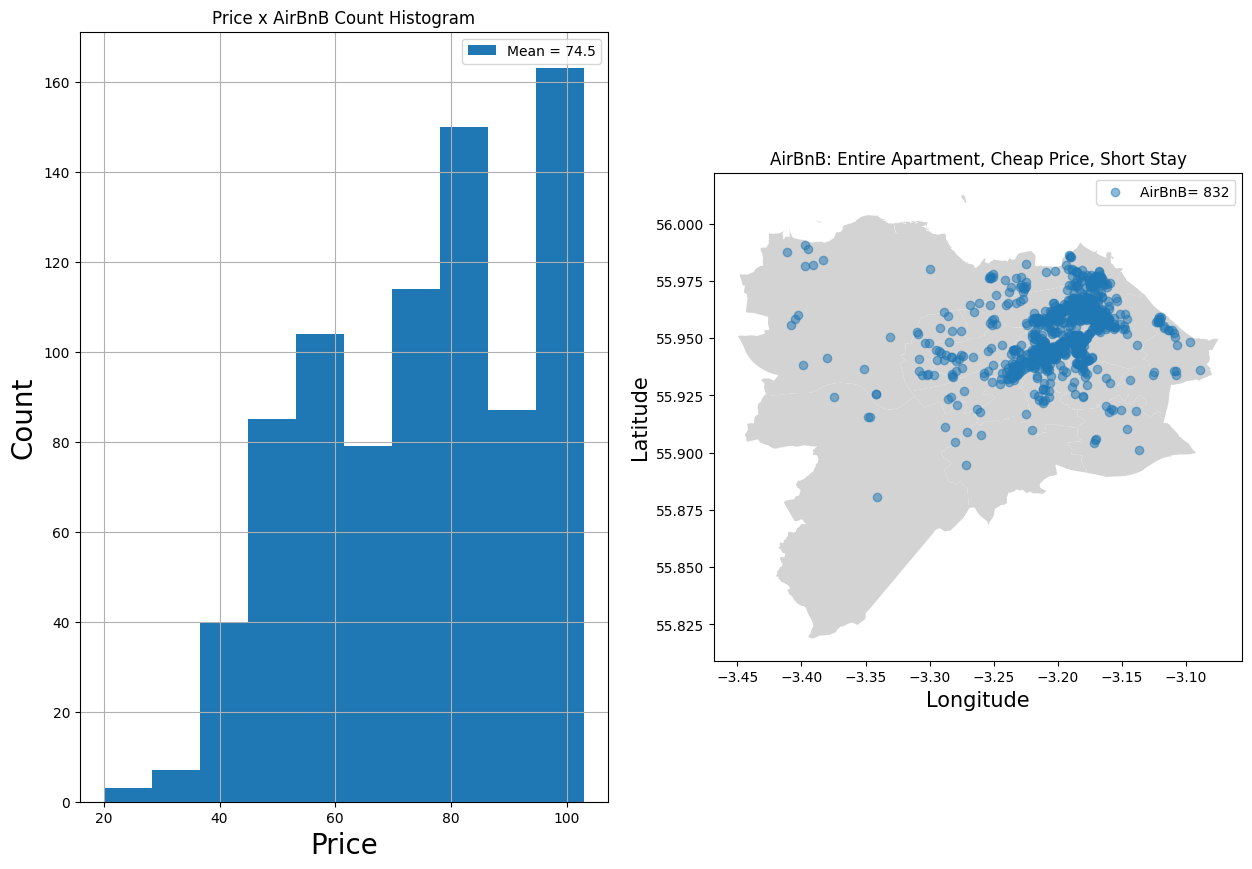

In [31]:
scattertomap(X_Entire_Cheap_Short)
plt.title('AirBnB: Entire Apartment, Cheap Price, Short Stay')

Table: AirBnB of Entire Apartment type, cheap price, for short stay

In [32]:
new_data[new_data.index.isin(X_Entire_Cheap_Short.index)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
17,109731,Holyrood Park Flat near Arthur Seat,565761,Noël,NaN,Meadowbank and Abbeyhill North,55.95533,-3.15850,Entire home/apt,50,1,358,2019-06-21,3.67,4,30
55,327159,Central Old Town Castle Apt,1672688,Maggie,NaN,"Old Town, Princes Street and Leith Street",55.94621,-3.19749,Entire home/apt,94,1,75,2019-05-21,0.86,2,365
56,327161,"Central Old Town Apt, parking, Wifi",1672688,Maggie,NaN,"Old Town, Princes Street and Leith Street",55.94860,-3.18342,Entire home/apt,93,1,59,2019-06-18,0.74,2,358
119,530628,Elegant Stylish Central 5 Bed TownHouse +fast ...,2605039,John,NaN,Deans Village,55.95072,-3.21633,Entire home/apt,56,1,109,2019-05-06,1.29,3,278
148,607248,"VINTAGE apt,pvt GARDEN,wifiNEW TOWN",3008499,Rebecca,NaN,Broughton North and Powderhall,55.96364,-3.19260,Entire home/apt,99,1,371,2019-06-22,4.43,25,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13145,35889828,Specious 3 Bedrooms (4 Beds) Apartment by Old ...,267737815,Mike,NaN,Hillside and Calton Hill,55.96004,-3.18032,Entire home/apt,89,1,0,NaN,NaN,22,68
13167,35920492,Spacious central flat with free parking,40365616,Victor,NaN,Abbeyhill,55.95589,-3.17143,Entire home/apt,50,1,0,NaN,NaN,5,112
13189,35976905,Nice and cosy flat not far from the city center,95837465,Dumitru,NaN,Gorgie West,55.93869,-3.24160,Entire home/apt,60,1,0,NaN,NaN,1,57
13191,35982555,UKLHB apartments,103911311,우진,NaN,New Town West,55.95407,-3.19841,Entire home/apt,80,1,0,NaN,NaN,1,71
